In [49]:
import torch 
import torch.nn as nn 

import matplotlib.pyplot as plt


# optional 
%matplotlib inline
plt.style.use(['dark_background', 'bmh'])
plt.rc('axes', facecolor='k')
plt.rc('figure', facecolor='k')
plt.rc('figure', figsize=(10,5))

## Sampling few points from a Normal Distribution
### These sampled points will be our Data for this Experiment

In [50]:
X = torch.randn(1000, 2).to("cuda")
print(X.shape)

torch.Size([1000, 2])


In [51]:
# Function to Plot the Points

def plot_points(points, title = None):
    plt.figure()
    points = points.cpu().numpy()
    colors = X[:, 0].cpu().numpy()
    plt.scatter(points[:, 0], points[:, 1], c = colors)
    if title:
        plt.title(title)
    plt.plot()

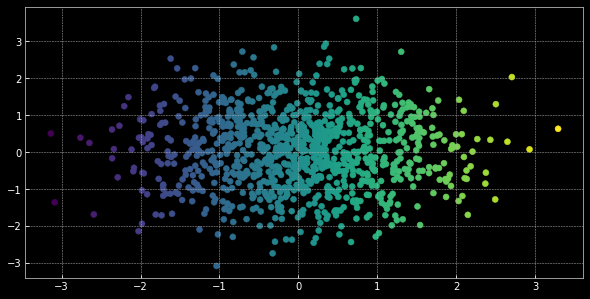

In [52]:
plot_points(X)

## Now let's do a basic Perceptron Operation 

$y_h  = (input * weights) + bias$

*In the below experiment, `bias = 0`*

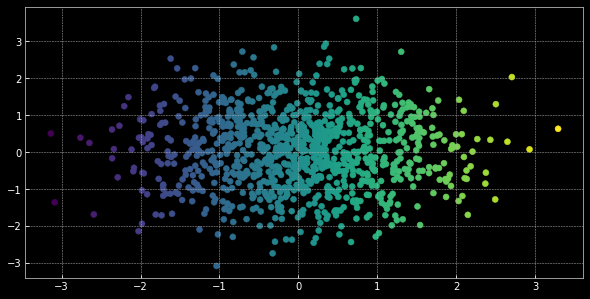

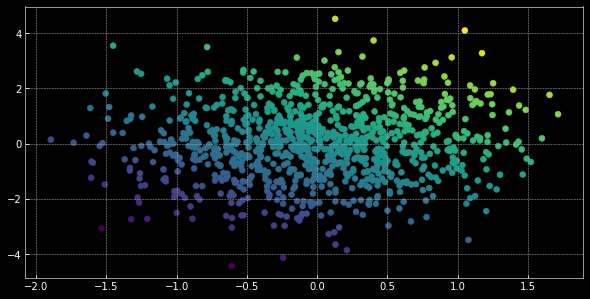

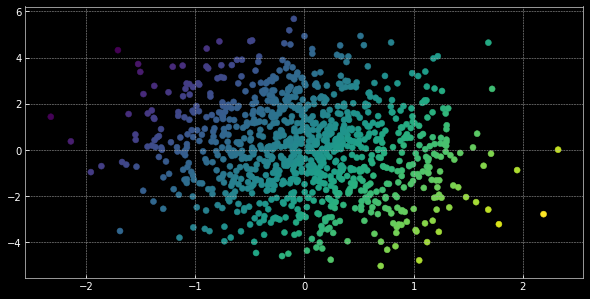

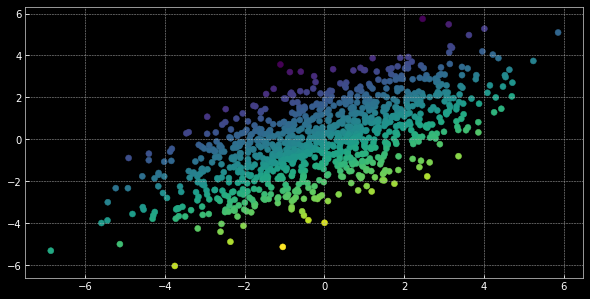

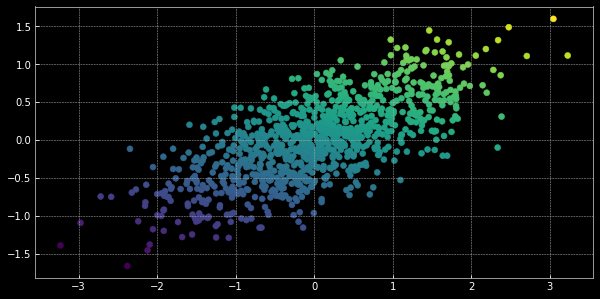

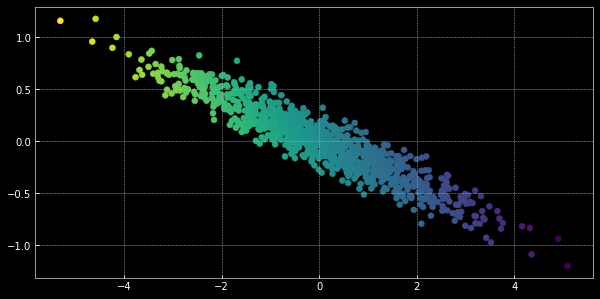

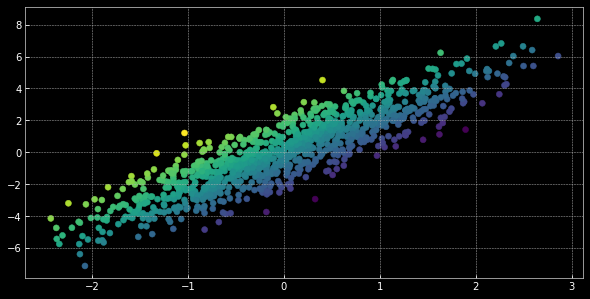

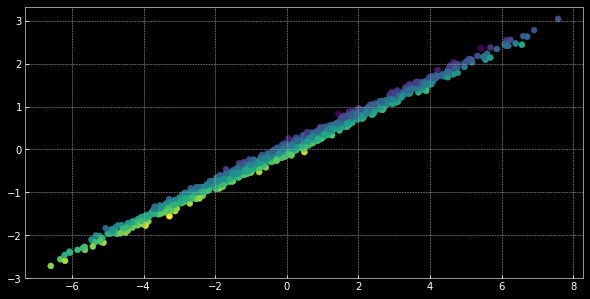

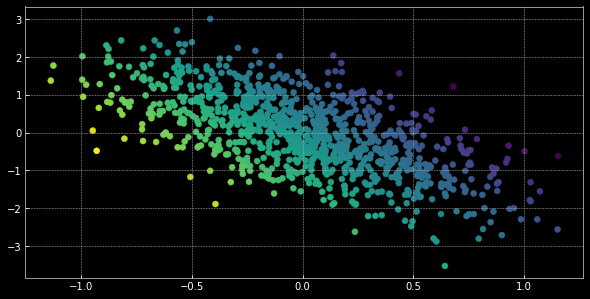

In [53]:
plot_points(X)
for i in range(8):
    W = torch.randn(2, 2).to("cuda")
    Y = X @ W.t()   # NN operation
    plot_points(Y)

# Build a Neural Network with PyTorch

In [54]:
import torch.nn as nn 

In [55]:
class MyNN(nn.Module):
    def __init__(self):
        super(MyNN, self).__init__()
        self.layer = nn.Linear(2, 2, bias = False)
        
    def forward(self, x):
        return self.layer(x)

In [56]:
net = MyNN().to("cuda")
print(net)

MyNN(
  (layer): Linear(in_features=2, out_features=2, bias=False)
)


In [57]:
output = net(X)

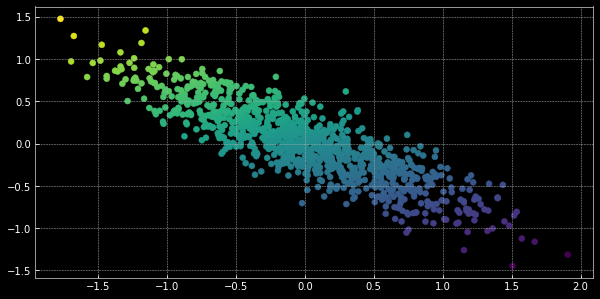

In [58]:
plot_points(output.detach())

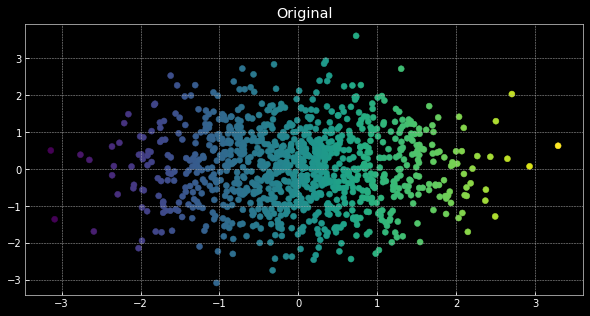

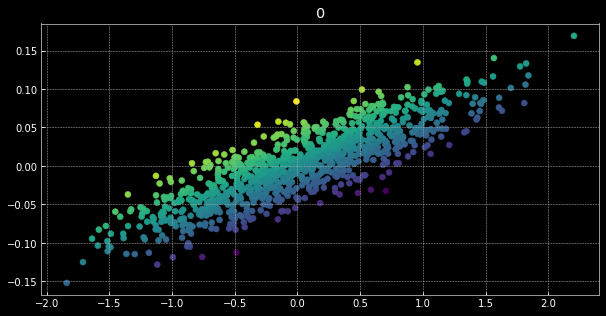

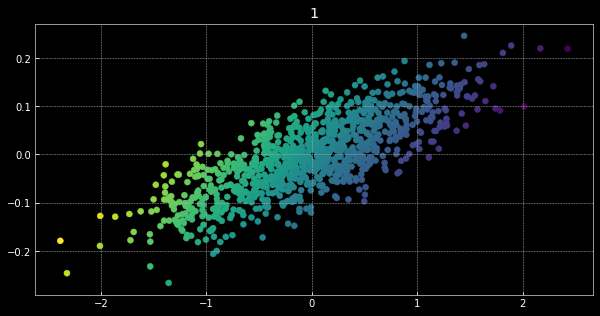

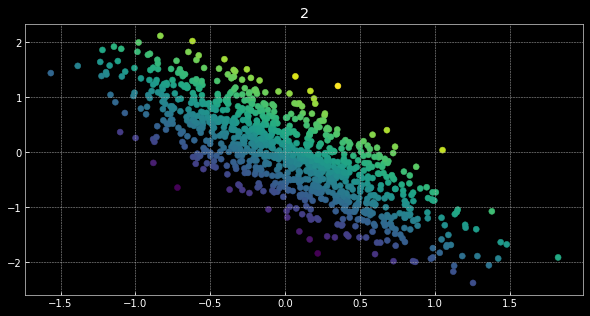

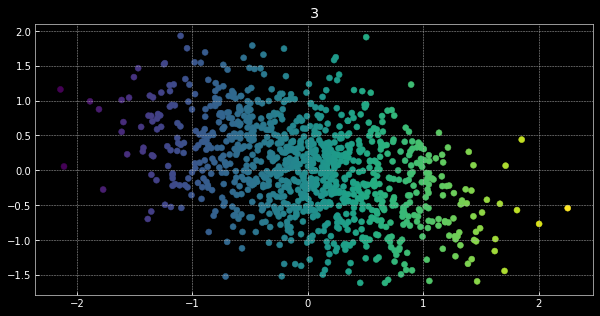

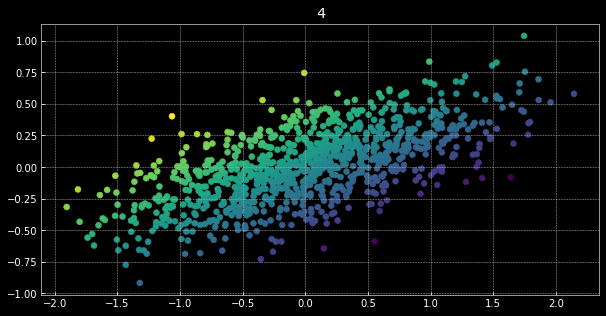

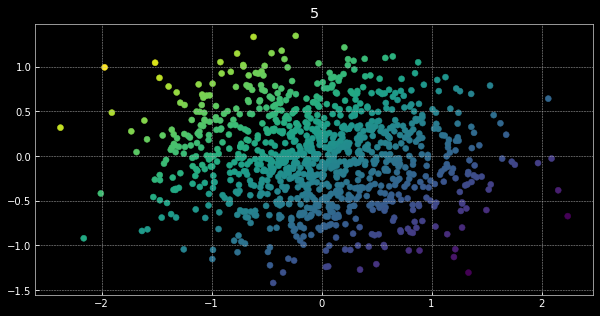

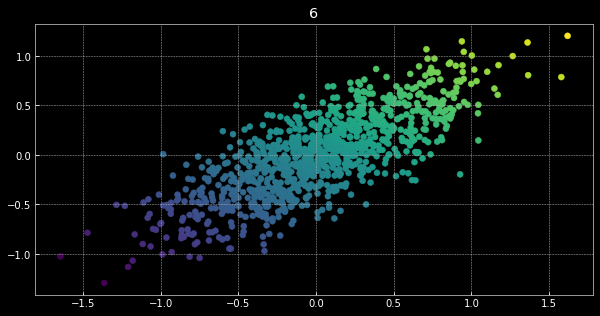

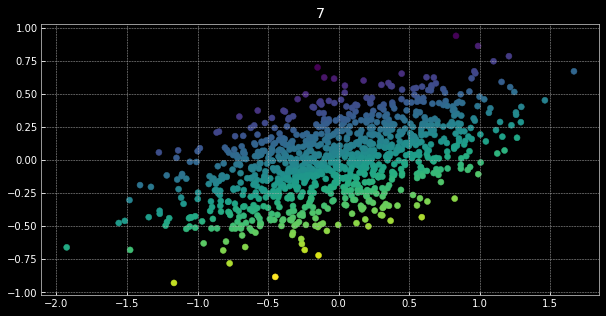

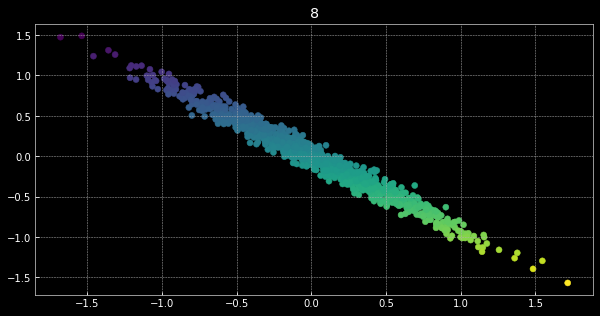

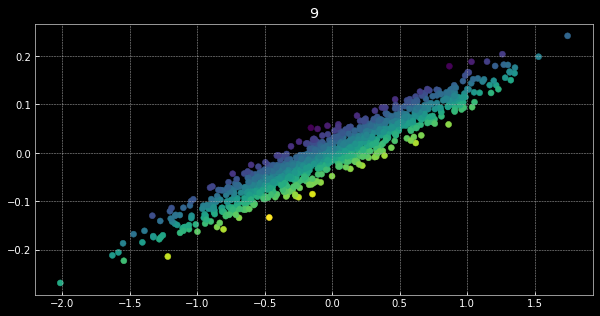

In [59]:
plot_points(X, title = "Original")

for i in range(10):
    net = MyNN().to("cuda")
    output = net(X)
    plot_points(output.detach(), title = str(i))

## Now let's add some Non Linearity

### Let's start with $tanh$

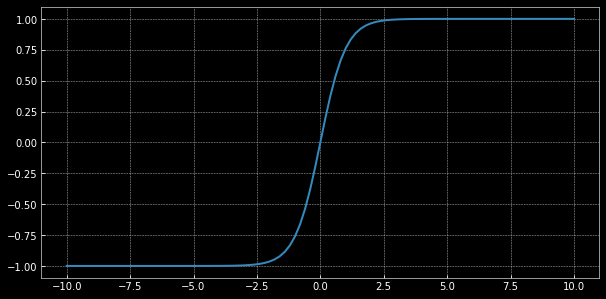

In [60]:
s = torch.linspace(-10, 10, 101)
m = torch.tanh(s)
plt.plot(s.numpy(), m.numpy())

### Now let's define a new Neural Network with Non Linearity

In [61]:
class MyNonLinearNN(nn.Module):
    def __init__(self):
        super(MyNonLinearNN, self).__init__()
        self.layer = nn.Linear(2, 2, bias = False)
        self.act = nn.Tanh()
        
    def forward(self, x):
        return self.act(self.layer(x))

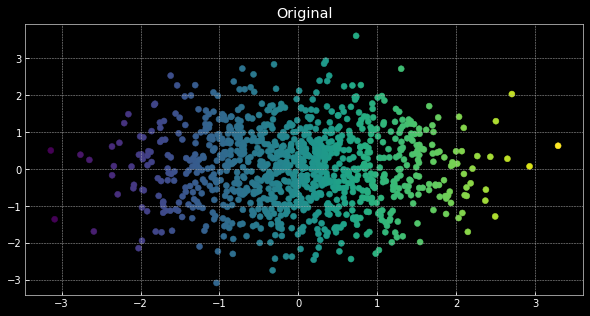

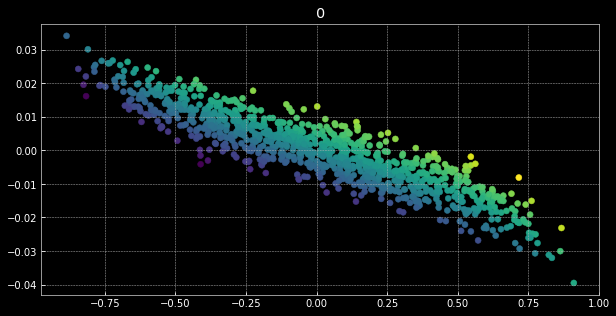

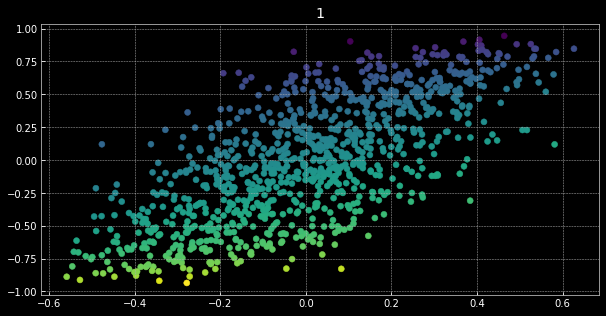

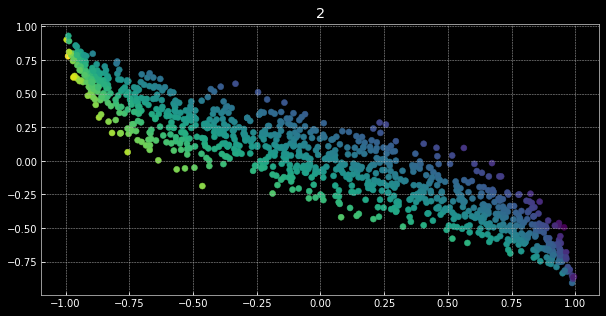

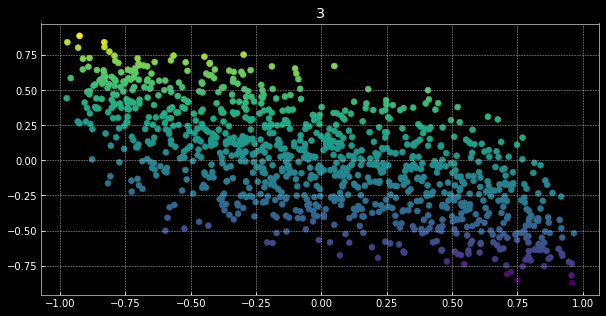

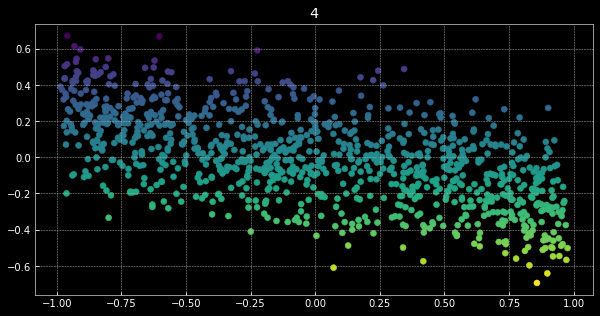

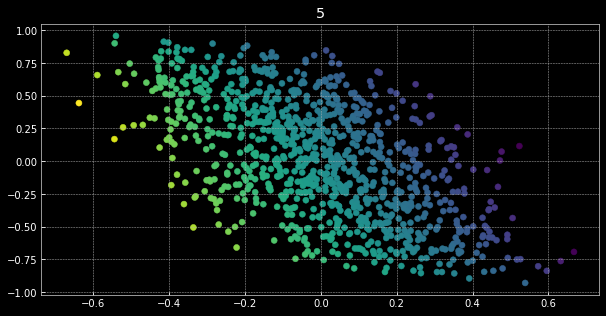

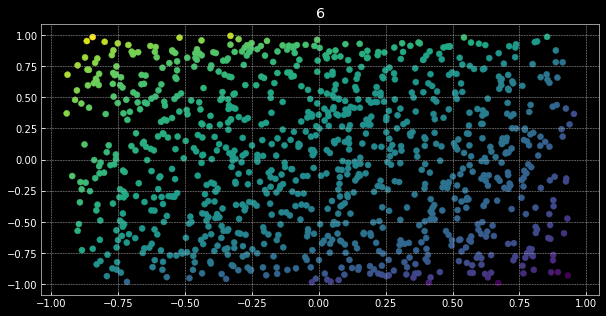

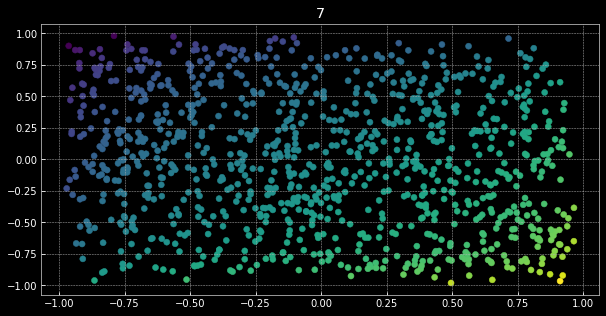

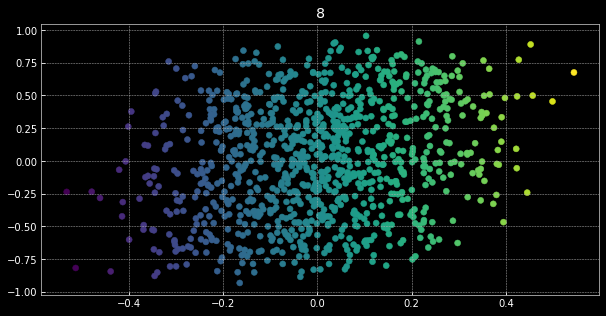

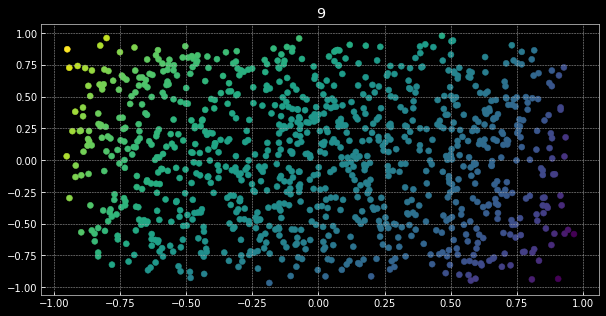

In [62]:
plot_points(X, title = "Original")

for i in range(10):
    nlnet = MyNonLinearNN().to("cuda")
    output = nlnet(X)
    plot_points(output.detach(), title = str(i))

In [63]:
class MyNonLinearDeepNN(nn.Module):
    def __init__(self):
        super(MyNonLinearDeepNN, self).__init__()
        self.layer1 = nn.Linear(2, 5)
        self.act = nn.Tanh()
        self.layer2 = nn.Linear(5, 2)
        
    def forward(self, x):
        o1 = self.act(self.layer1(x))
        return self.layer2(o1)

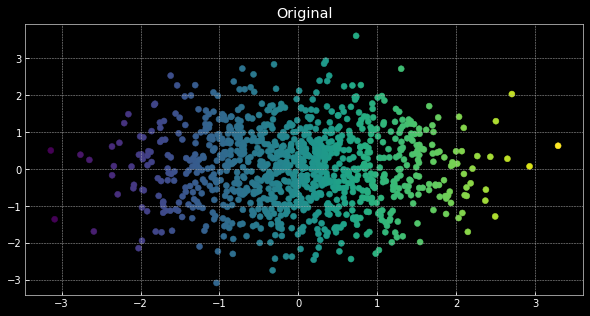

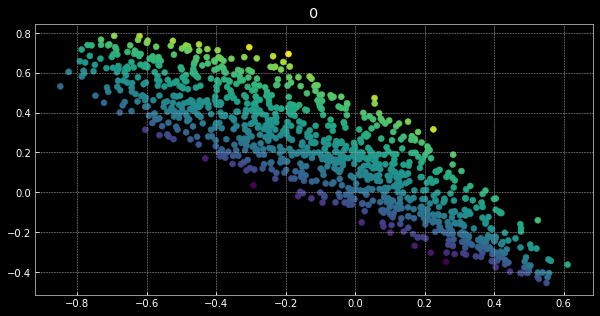

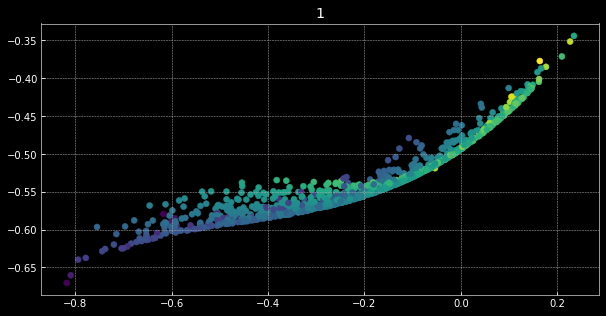

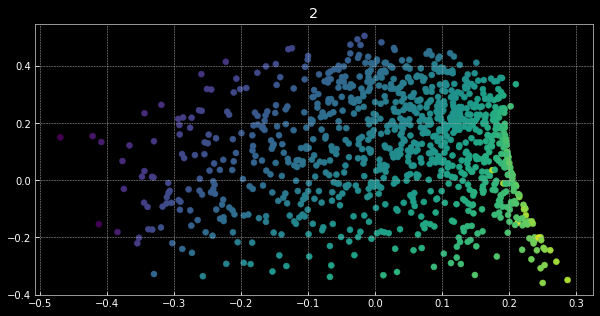

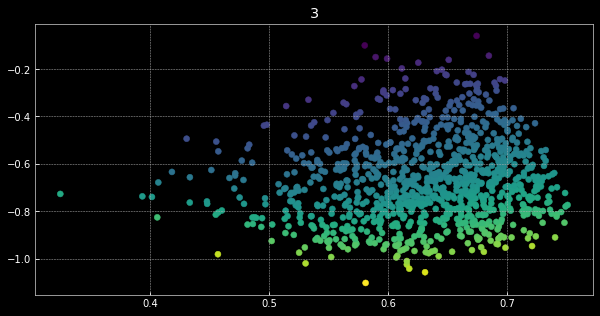

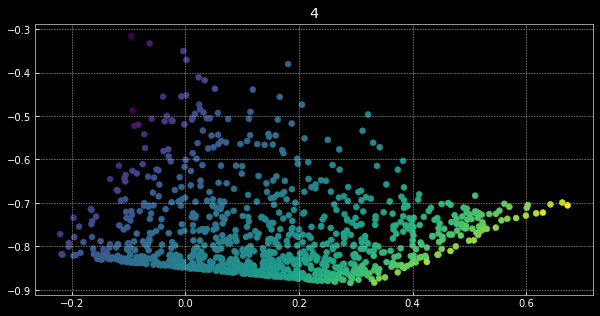

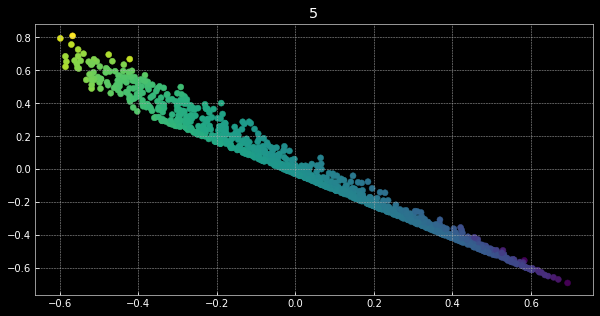

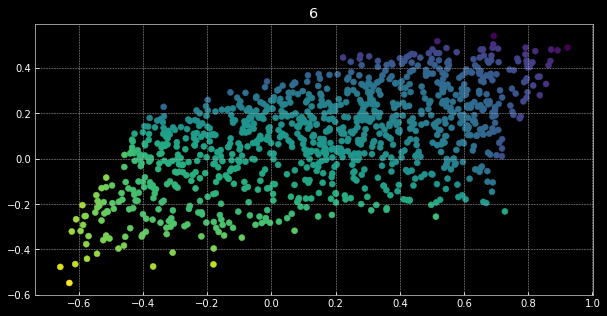

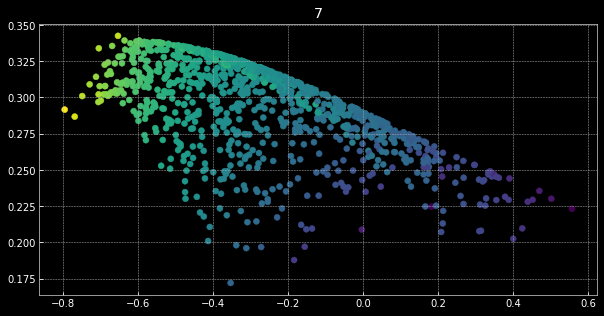

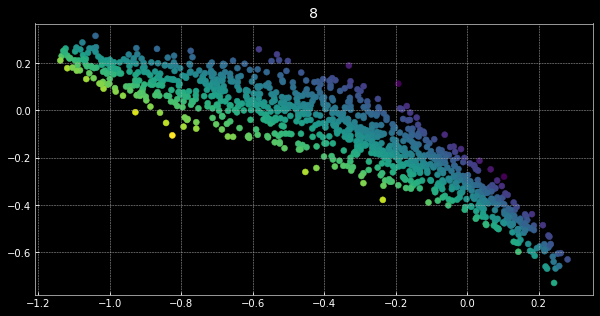

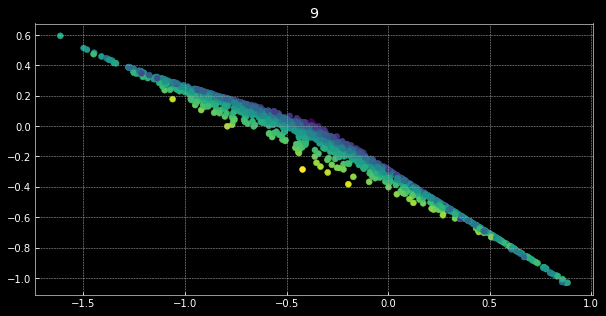

In [64]:
plot_points(X, title = "Original")

for i in range(10):
    nlnet = MyNonLinearDeepNN().to("cuda")
    output = nlnet(X)
    plot_points(output.detach(), title = str(i))

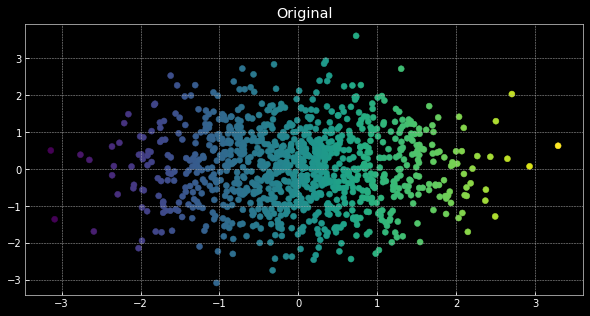

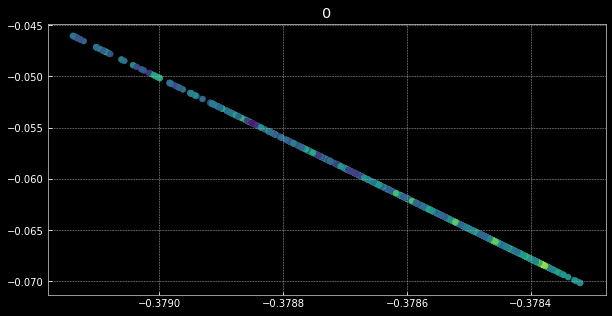

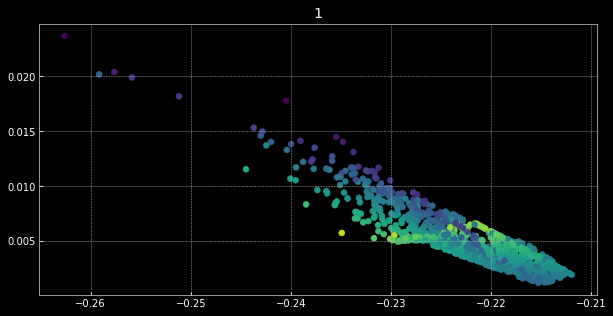

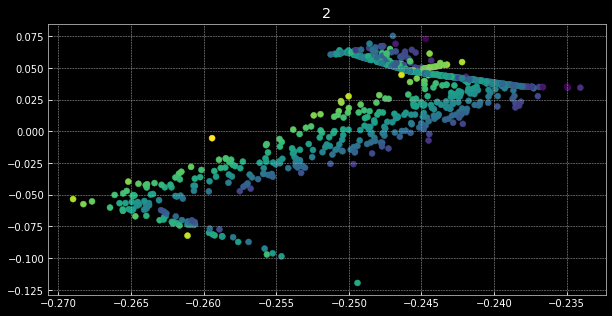

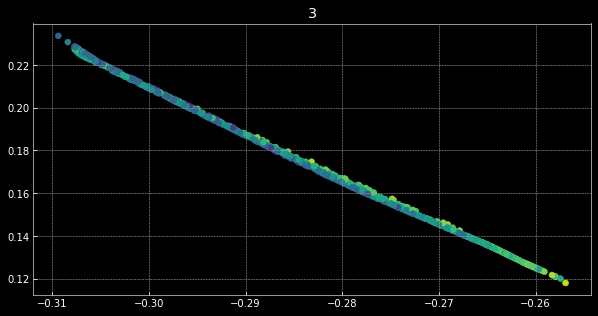

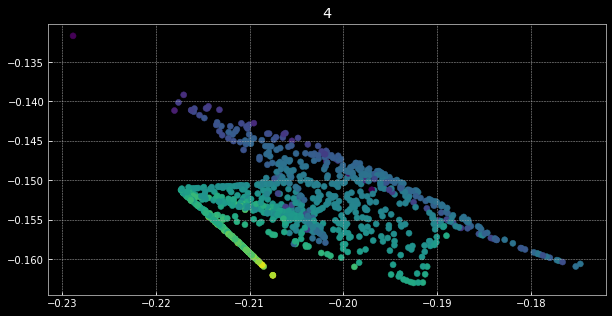

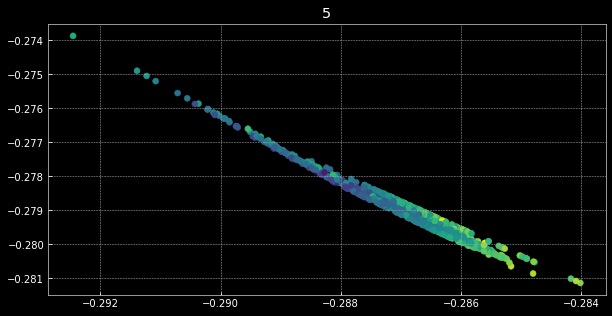

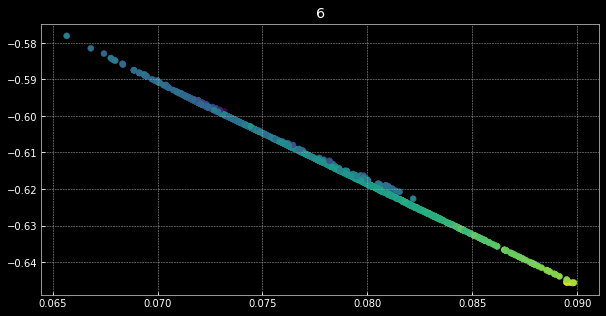

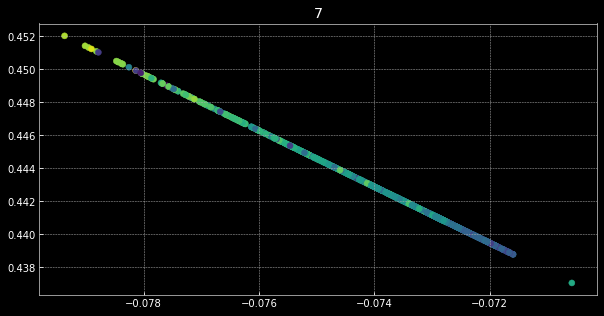

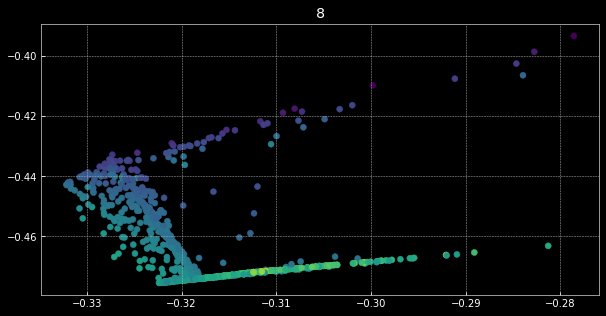

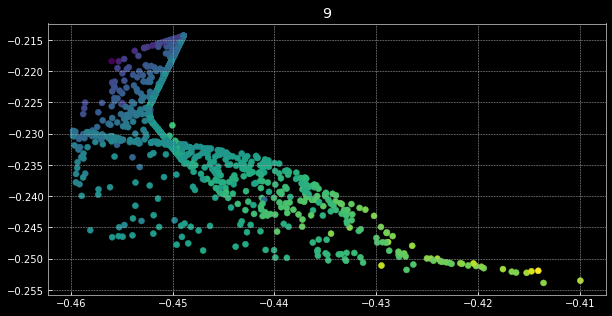

In [65]:
class MyNonLinearDeepNN(nn.Module):
    def __init__(self):
        super(MyNonLinearDeepNN, self).__init__()
        self.layer1 = nn.Linear(2, 5)
        self.act = nn.ReLU()
        self.layer2 = nn.Linear(5, 5)
        self.out = nn.Linear(5, 2)
        
    def forward(self, x):
        x = self.act(self.layer1(x))
        x = self.act(self.layer2(x))
        x = self.act(self.layer2(x))
        x = self.act(self.layer2(x))
        
        return self.out(x)
    
plot_points(X, title = "Original")

for i in range(10):
    nlnet = MyNonLinearDeepNN().to("cuda")
    output = nlnet(X)
    plot_points(output.detach(), title = str(i))